# Programming Language Popularity Data Exploration

## Introduction

In this project, the aim is to explore the popularity of programming languages based on data collected from [Stack Exchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com).
Stack Exchange hosts a plethora of programming-related communities where developers ask questions, share knowledge, and engage with each other. By analyzing the activity and discussions surrounding different programming languages on Stack Exchange, we can gain insights into their popularity and usage patterns.

Data are gathered as .csv file by following the link [Stack Exchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) and running the query:

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

The data exploration process involves several steps as follows.
1. Data Preprocessing: Handling missing values, converting date format, and formatting data for further exploration.
2. Exploratory Data Analysis: Visualizing trends over time, comparing the popularity of different programming languages.
3. Time Series Analysis: Examining how the popularity of programming languages has evolved over time.

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv("QueryResults.csv", header=0, names=["DATE", "TAG", "POSTS"])

Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
print(df.head())
print(df.tail())

                  DATE   TAG  POSTS
0  2008-07-01 00:00:00    c#      3
1  2008-08-01 00:00:00   php    157
2  2008-08-01 00:00:00  ruby     70
3  2008-08-01 00:00:00     c     83
4  2008-08-01 00:00:00   c++    164
                     DATE         TAG  POSTS
2588  2024-02-01 00:00:00        perl     36
2589  2024-02-01 00:00:00      delphi    111
2590  2024-02-01 00:00:00          go    309
2591  2024-02-01 00:00:00         php   1311
2592  2024-02-01 00:00:00  javascript   4790


Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [4]:
df.shape

(2593, 3)

Count the number of entries in each column of the dataframe

In [5]:
df.count()

DATE     2593
TAG      2593
POSTS    2593
dtype: int64

Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [6]:
df.groupby("TAG").sum(numeric_only=True)

,POSTS
TAG,
assembly,44031
c,402954
c#,1611568
c++,804710
delphi,51725
go,72371
java,1913116
javascript,2522340
perl,68041


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

How many months of data exist per language? Which language had the fewest months with an entry?


In [7]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,187,187
c,187,187
c#,188,188
c++,187,187
delphi,187,187
go,172,172
java,187,187
javascript,187,187
perl,187,187


## Data Cleaning

Fixing the date format to make it more readable. Using Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [8]:
df["DATE"][1]

'2008-08-01 00:00:00'

In [9]:
print(df.DATE[1])
type(df["DATE"][1])

2008-08-01 00:00:00


str

In [10]:
# Convert the entry
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))

# Convert entire column
df.DATE = pd.to_datetime(df.DATE)
df.head()

2008-08-01 00:00:00


,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,php,157
2,2008-08-01,ruby,70
3,2008-08-01,c,83
4,2008-08-01,c++,164


## Data Manipulation



In [11]:
# Creating a new data frame
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")

Check the dimensions of the new dataframe. How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [12]:
reshaped_df.shape

(188, 14)

In [13]:
print(reshaped_df.columns)

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')


In [14]:
print(reshaped_df.head())
print(reshaped_df.tail())

TAG         assembly      c      c#    c++  delphi  go    java  javascript   
DATE                                                                         
2008-07-01       NaN    NaN     3.0    NaN     NaN NaN     NaN         NaN  \
2008-08-01       8.0   83.0   504.0  164.0    14.0 NaN   222.0       163.0   
2008-09-01      28.0  320.0  1639.0  755.0   104.0 NaN  1129.0       634.0   
2008-10-01      16.0  303.0  1987.0  807.0   112.0 NaN  1149.0       722.0   
2008-11-01      16.0  258.0  1729.0  734.0   140.0 NaN   954.0       580.0   

TAG          perl    php  python    r   ruby  swift  
DATE                                                 
2008-07-01    NaN    NaN     NaN  NaN    NaN    NaN  
2008-08-01   28.0  157.0   119.0  NaN   70.0    NaN  
2008-09-01  130.0  474.0   537.0  6.0  286.0    NaN  
2008-10-01  128.0  604.0   506.0  NaN  247.0    NaN  
2008-11-01   97.0  497.0   448.0  1.0  157.0    NaN  
TAG         assembly      c      c#     c++  delphi     go    java   
DATE 

Count the number of entries per programming language.

In [15]:
reshaped_df.count()

TAG
assembly      187
c             187
c#            188
c++           187
delphi        187
go            172
java          187
javascript    187
perl          187
php           187
python        187
r             185
ruby          187
swift         178
dtype: int64

In [16]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,504.0,164.0,14.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,807.0,112.0,0.0,1149.0,722.0,128.0,604.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,140.0,0.0,954.0,580.0,97.0,497.0,448.0,1.0,157.0,0.0


In [17]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


Plot a single programming language (e.g., java) on a chart using matplotlib

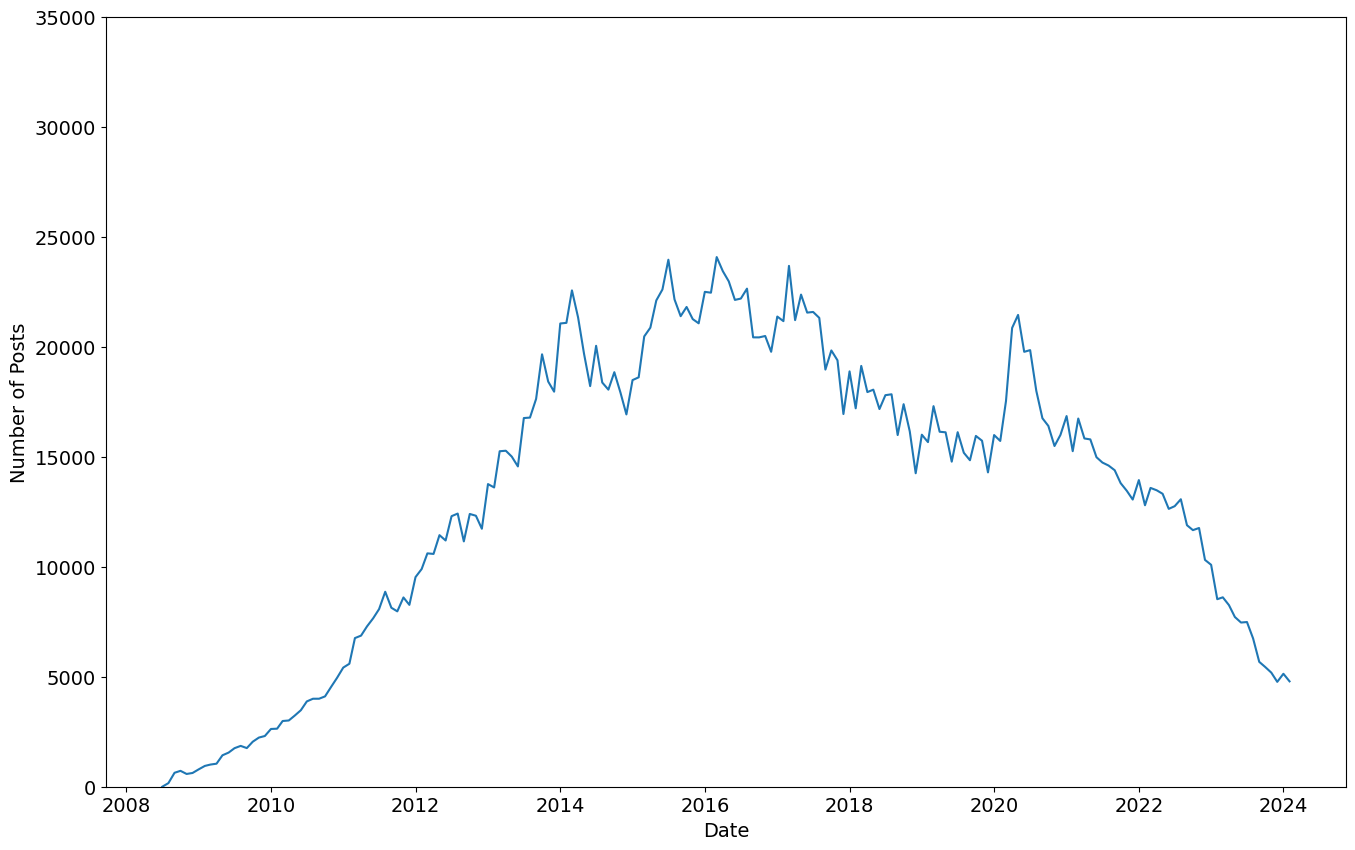

In [18]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df["javascript"])
plt.show()

Show two line (e.g. for Java and Python) on the same chart

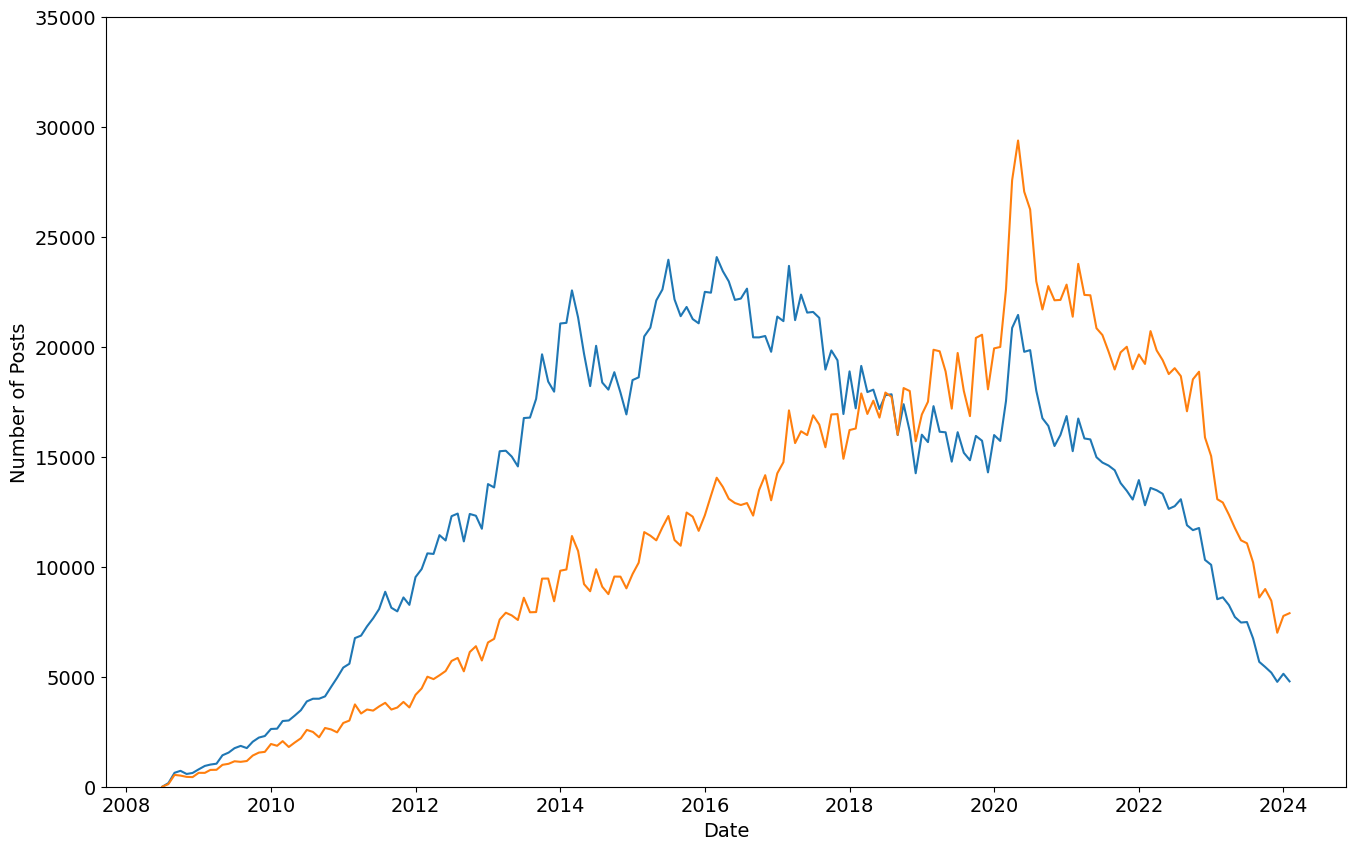

In [19]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df["javascript"])
plt.plot(reshaped_df["python"])
plt.show()

Plot all the programming languages on the same chart

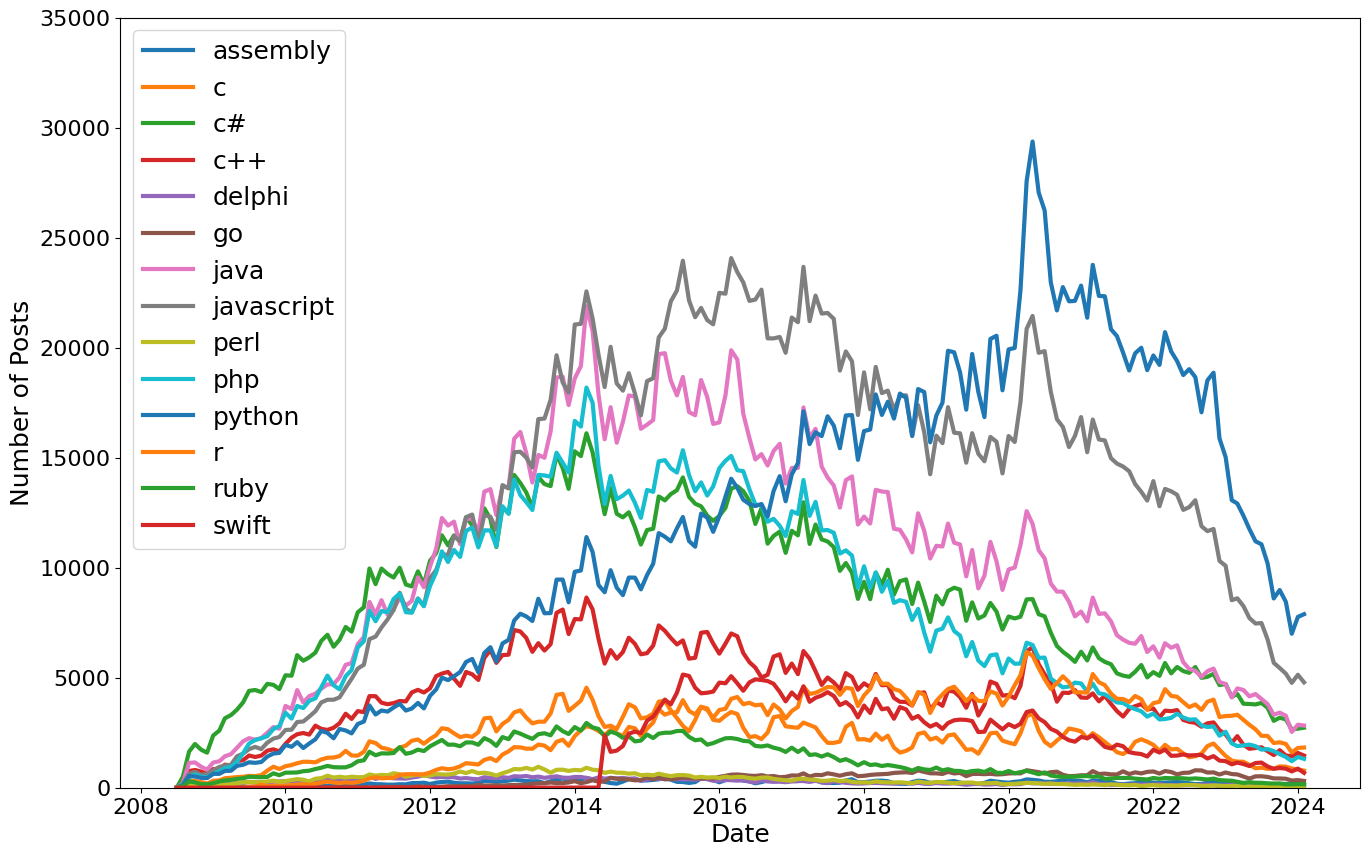

In [20]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Number of Posts", fontsize=18)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
  plt.plot(reshaped_df[column], label=column, linewidth=3)
plt.legend(fontsize=18)
plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

In [21]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=5).mean()

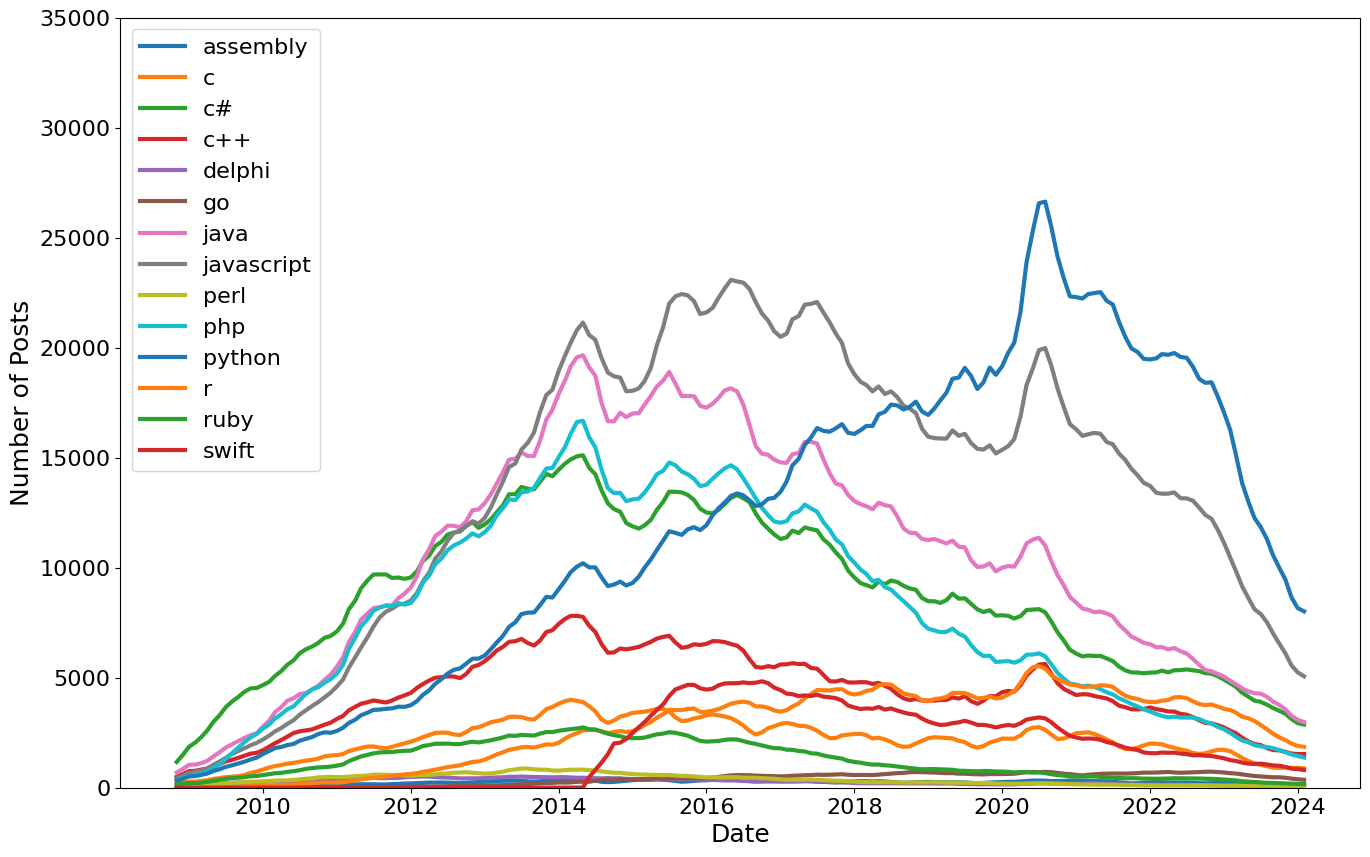

In [22]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Number of Posts", fontsize=18)
plt.ylim(0, 35000)

# plot roll_df
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], label=roll_df[column].name, linewidth=3)
plt.legend(fontsize=16)
plt.show()